#### IMPORTING DEPENDENCIES

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.svm import SVC


In [240]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data",
               names=
               ["Class attribute","T3 resin uptake test",
                     "Total Serum thyroxin",
                    "Total serum triiodothyronine",
                      "basal thyroid-stimulating hormone (TSH)",
                     "Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])

In [241]:
data

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...,...
210,3,118,6.5,1.3,1.7,11.5
211,3,139,4.2,0.7,4.3,6.3
212,3,103,5.1,1.4,1.2,5.0
213,3,97,4.7,1.1,2.1,12.6


#### DATA EXPLORATION

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Class attribute                                                                                                                             215 non-null    int64  
 1   T3 resin uptake test                                                                                                                        215 non-null    int64  
 2   Total Serum thyroxin                                                                                                                        215 non-null    float64
 3   Total serum triiodothyronine                  

In [243]:
data.isna().sum()

Class attribute                                                                                                                               0
T3 resin uptake test                                                                                                                          0
Total Serum thyroxin                                                                                                                          0
Total serum triiodothyronine                                                                                                                  0
basal thyroid-stimulating hormone (TSH)                                                                                                       0
Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value    0
dtype: int64

In [244]:
data.duplicated().sum()

0

In [245]:
data.describe()

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.441860,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.726737,13.145447,4.697362,1.419486,6.118031,8.070519
min,1.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,1.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,2.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,3.000000,144.000000,25.300000,10.000000,56.400000,56.300000


In [246]:
data.dtypes

Class attribute                                                                                                                                 int64
T3 resin uptake test                                                                                                                            int64
Total Serum thyroxin                                                                                                                          float64
Total serum triiodothyronine                                                                                                                  float64
basal thyroid-stimulating hormone (TSH)                                                                                                       float64
Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value    float64
dtype: object

In [247]:
data.shape

(215, 6)

#### DATA EXPLORATION

<AxesSubplot:xlabel='Class attribute', ylabel='count'>

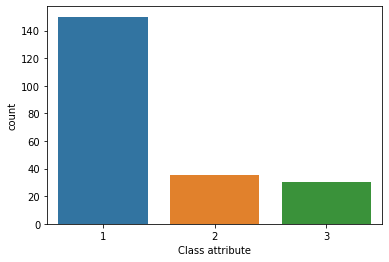

In [248]:
sns.countplot(x="Class attribute",data=data)

#### DATA CLEANING

In [249]:
data["T3 resin uptake test"].describe()

count    215.000000
mean     109.595349
std       13.145447
min       65.000000
25%      103.000000
50%      110.000000
75%      117.500000
max      144.000000
Name: T3 resin uptake test, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7937c2640>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7937c2d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7937c22e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7937c8400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7937c8760>],
 'means': []}

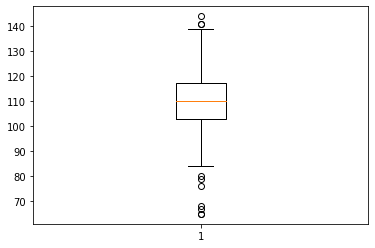

In [250]:
plt.boxplot(data["T3 resin uptake test"])

In [251]:
def outlierremove(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [252]:
lower_1,upper_1=outlierremove(data["T3 resin uptake test"])
lower_1,upper_1


(81.25, 139.25)

In [253]:
data['T3 resin uptake test']=np.where(data['T3 resin uptake test']>upper_1,upper_1,data['T3 resin uptake test'])

In [254]:
data['T3 resin uptake test']=np.where(data['T3 resin uptake test']<lower_1,lower_1,data['T3 resin uptake test'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7937fb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7937fbfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7937fb580>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7938036a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d793803a00>],
 'means': []}

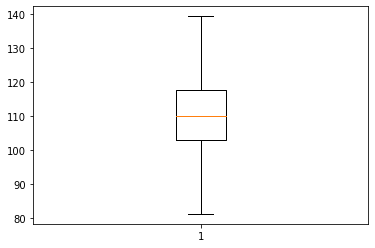

In [255]:
plt.boxplot(data["T3 resin uptake test"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d79383a460>,
 'caps': [<matplotlib.lines.Line2D at 0x1d79383ab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d79383a100>],
 'medians': [<matplotlib.lines.Line2D at 0x1d793841220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d793841580>],
 'means': []}

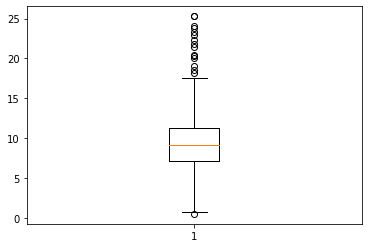

In [256]:
plt.boxplot(data["Total Serum thyroxin"])

In [257]:
lower_2,upper_2=outlierremove(data["Total Serum thyroxin"])
lower_2,upper_2


(0.799999999999998, 17.6)

In [258]:
data['Total Serum thyroxin']=np.where(data['Total Serum thyroxin']>upper_2,upper_2,data['Total Serum thyroxin'])

In [259]:
data['Total Serum thyroxin']=np.where(data['Total Serum thyroxin']<lower_2,lower_2,data['Total Serum thyroxin'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d793872c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d79387d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7938728b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d79387d9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d79387dd30>],
 'means': []}

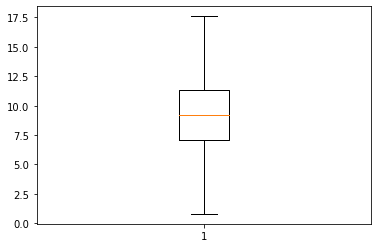

In [260]:
plt.boxplot(data["Total Serum thyroxin"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d791ec0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d79195eaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d791ec0220>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7920d7340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d791ebe1f0>],
 'means': []}

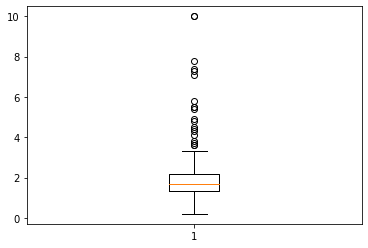

In [261]:
plt.boxplot(data["Total serum triiodothyronine"])

In [262]:
lower_1,upper_1=outlierremove(data["Total serum triiodothyronine"])
lower_1,upper_1


(0.07499999999999996, 3.4750000000000005)

In [263]:
data['Total serum triiodothyronine']=np.where(data['Total serum triiodothyronine']>upper_1,upper_1,data['Total serum triiodothyronine'])

In [264]:
data['T3Total serum triiodothyronine']=np.where(data['Total serum triiodothyronine']<lower_1,lower_1,data['Total serum triiodothyronine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d791fc4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d792686b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d791fc4190>],
 'medians': [<matplotlib.lines.Line2D at 0x1d791e96b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d791e96640>],
 'means': []}

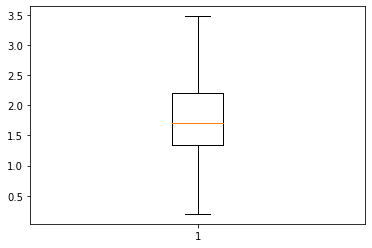

In [265]:
plt.boxplot(data["Total serum triiodothyronine"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d791d67070>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7921fd610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7925742b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d791989d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d79389e4f0>],
 'means': []}

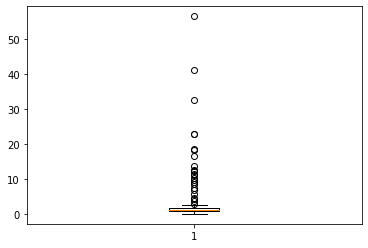

In [266]:
plt.boxplot(data["basal thyroid-stimulating hormone (TSH)"])

In [267]:
lower_1,upper_1=outlierremove(data["basal thyroid-stimulating hormone (TSH)"])
lower_1,upper_1


(-0.04999999999999982, 2.75)

In [268]:
data['basal thyroid-stimulating hormone (TSH)']=np.where(data['basal thyroid-stimulating hormone (TSH)']>upper_1,upper_1,data['basal thyroid-stimulating hormone (TSH)'])

In [269]:
data['basal thyroid-stimulating hormone (TSH)']=np.where(data['basal thyroid-stimulating hormone (TSH)']<lower_1,lower_1,data['basal thyroid-stimulating hormone (TSH)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d79394e700>,
 'caps': [<matplotlib.lines.Line2D at 0x1d79394edc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d79394e3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7939574c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d793957820>],
 'means': []}

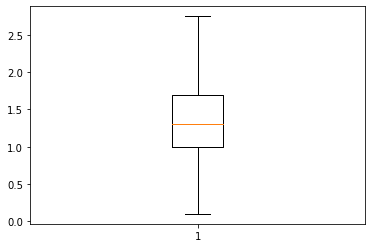

In [270]:
plt.boxplot(data["basal thyroid-stimulating hormone (TSH)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d79398bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1d793992250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d79398b7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d793992910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d793992c70>],
 'means': []}

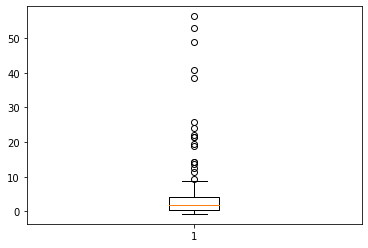

In [271]:
plt.boxplot(data["Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])

In [272]:
lower_1,upper_1=outlierremove(data["Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])
lower_1,upper_1


(-4.7749999999999995, 9.424999999999999)

In [273]:
data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']=np.where(data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']>upper_1,upper_1,data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value'])

In [274]:
data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']=np.where(data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value']<lower_1,lower_1,data['Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7939c9f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7939d3640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7939c9be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7939d3d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7939de0a0>],
 'means': []}

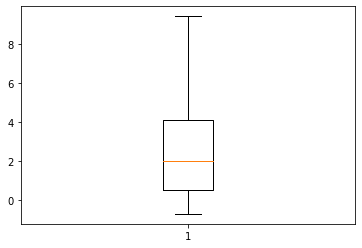

In [275]:
plt.boxplot(data["Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value"])

<AxesSubplot:xlabel='Class attribute', ylabel='count'>

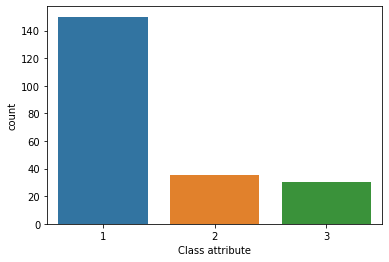

In [276]:
sns.countplot(x="Class attribute",data=data)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

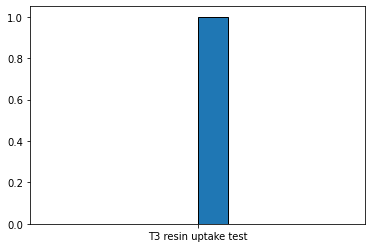

In [277]:
plt.hist("T3 resin uptake test",edgecolor="black")

C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T3 resin uptake test', ylabel='Density'>

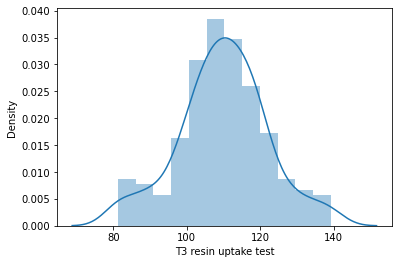

In [278]:
sns.distplot(data["T3 resin uptake test"])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

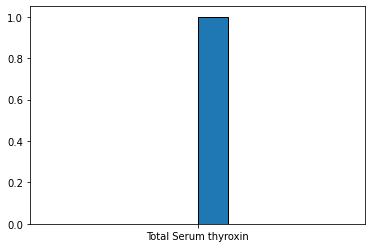

In [279]:
plt.hist("Total Serum thyroxin",edgecolor="black")

C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Serum thyroxin', ylabel='Density'>

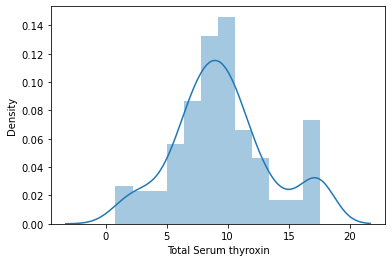

In [280]:
sns.distplot(data["Total Serum thyroxin"])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

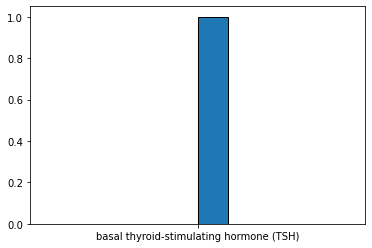

In [281]:
plt.hist("basal thyroid-stimulating hormone (TSH)",edgecolor="black")

C:\Users\Admi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='basal thyroid-stimulating hormone (TSH)', ylabel='Density'>

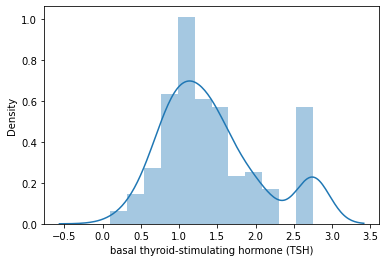

In [282]:
sns.distplot(data["basal thyroid-stimulating hormone (TSH)"])

In [283]:
d1=data.apply(LabelEncoder().fit_transform)

In [284]:
d1 = d1.drop(d1.columns[6],axis=1)

In [285]:
d1.head()

,Class attribute,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
0,0,21,52,20,7,32
1,0,27,50,28,18,56
2,0,40,67,22,12,12
3,0,23,19,14,12,21
4,0,19,31,13,13,5


In [286]:
def norm_func(i):
    x=(i-i.mean())/(i.min()-i.max())
    return x

In [287]:
d1.iloc[:,1:]

,T3 resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin releasing hormone as comparedto the basal value
0,21,52,20,7,32
1,27,50,28,18,56
2,40,67,22,12,12
3,23,19,14,12,21
4,19,31,13,13,5
...,...,...,...,...,...
210,32,25,11,15,68
211,47,16,5,23,58
212,17,18,12,10,52
213,11,17,9,19,68


In [288]:
data1=norm_func(d1.iloc[:,1:])
data1=data1.values
data1

array([[ 0.05784884, -0.07609519, -0.12806202,  0.21354904, -0.03105335],
       [-0.06715116, -0.05283937, -0.39472868, -0.26471183, -0.38399453],
       [-0.3379845 , -0.25051379, -0.19472868, -0.00384226,  0.2630643 ],
       ...,
       [ 0.14118217,  0.31925365,  0.13860465,  0.08311426, -0.325171  ],
       [ 0.26618217,  0.33088156,  0.23860465, -0.30819009, -0.56046512],
       [ 0.1620155 ,  0.30762574,  0.13860465,  0.039636  , -0.44281806]])

#### MODEL BUILDING AND MODEL EVALUTION

In [289]:
from sklearn.model_selection import train_test_split
Y=d1.iloc[:,0]
X=data1

In [290]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
210    2
211    2
212    2
213    2
214    2
Name: Class attribute, Length: 215, dtype: int64

In [291]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.23)

In [292]:
print("X_train_shape",X_train.shape,
     "X_test_shape",X_test.shape,
     "Y_train_shape",Y_train.shape,
     "Y_test_shape",Y_test.shape)

X_train_shape (165, 5) X_test_shape (50, 5) Y_train_shape (165,) Y_test_shape (50,)


### 1. Model  -  Logistic  Regression

In [293]:
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)


LogisticRegression()

### 2. Model - Decision  Tree  Classifier

In [294]:
model_dt=DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=100,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
    )
model_dt.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=100)

### 3. Model -  SVM 

In [295]:
model_svm=SVC(
    C=13,
    kernel='rbf',
    degree=3,
    gamma=0.5,)
model_svm.fit(X_train,Y_train)


SVC(C=13, gamma=0.5)

In [296]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[75,85,90,95,80,70,10,0.5],'C':[25,30,40,50,20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 30, 40, 50, 20, 15, 14, 13, 12, 11, 10, 0.1,
                                0.001],
                          'gamma': [75, 85, 90, 95, 80, 70, 10, 0.5],
                          'kernel': ['rbf']}])

In [297]:
gsv.best_params_ , gsv.best_score_

({'C': 40, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9816176470588236)

### 4. Model - KNN 

In [300]:
model_knn=KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)
model_knn.fit(X_train,Y_train)
model_knn_score=model_knn.score(X_test,Y_test)
model_knn_score

0.92

In [301]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [302]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [303]:
print(grid.best_score_)
print(grid.best_params_)

0.9534883720930232
{'n_neighbors': 3}


### 5. Model - Bagging Classifier

In [304]:
kfold = KFold(n_splits=10,)
cart = DecisionTreeClassifier()
num_trees = 100
model_bagg= BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=100)
results =cross_val_score(model_bagg, X, Y, cv=kfold)
model_bagg_score=(results.mean()*100)
model_bagg_score

93.8961038961039

###  6. Model - Random Forest Classifier

In [305]:
num_trees = 90
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model_rf= RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=100)
results = cross_val_score(model_rf, X, Y, cv=kfold)
model_rf_score=(results.mean()*100)
model_rf_score

C:\Users\Admi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


95.30303030303031

### 7. Model - Adaboost classifier

In [306]:
num_trees = 10
kfold = KFold(n_splits=10, random_state=100)
model_ada= AdaBoostClassifier(n_estimators=num_trees,random_state=100)
results = cross_val_score(model_ada, X, Y, cv=kfold)
model_ada_score=(results.mean()*100)
model_ada_score

C:\Users\Admi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


70.06493506493506

### 8. Model -  Voting Classifier

In [307]:
kfold = KFold(n_splits=10, random_state=100)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
model_vot_score=(results.mean()*100)
model_vot_score

C:\Users\Admi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


94.30735930735932

In [308]:
ACCURACY_TABEL={
               "Logistic Regression      ":model_log_score,
               "Decision Tree Classifier ":model_dt_score,
               "SVM(using GRIDSearchCV)  ":model_svm_score,
               "KNN(using GRIDSearchCV)  ":model_knn_score,
               "Bagging Classifier       ":model_bagg_score,
               "Random Forest Classifier ":model_rf_score,
               "Adaboost Classifier      ":model_ada_score,
               "Voting Classifier        ":model_vot_score
               }

In [309]:
ACCURACY_TABEL

{'Logistic Regression      ': 98.0,
 'Decision Tree Classifier ': 0.96,
 'SVM(using GRIDSearchCV)  ': 0.98,
 'KNN(using GRIDSearchCV)  ': 0.92,
 'Bagging Classifier       ': 93.8961038961039,
 'Random Forest Classifier ': 95.30303030303031,
 'Adaboost Classifier      ': 70.06493506493506,
 'Voting Classifier        ': 94.30735930735932}

#### FINAL MODEL:  DECISION TREE CLASSIFIER

In [310]:
model_2=DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=100,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
    )
model_2.fit(X_train,Y_train)
model_2_score=model_2.score(X_test,Y_test)
model_2_score

0.92

In [314]:
model_svm.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 0, 2], dtype=int64)

In [313]:
data.values

array([[  1.   , 107.   ,  10.1  , ...,   0.9  ,   2.7  ,   2.2  ],
       [  1.   , 113.   ,   9.9  , ...,   2.   ,   5.9  ,   3.1  ],
       [  1.   , 127.   ,  12.9  , ...,   1.4  ,   0.6  ,   2.4  ],
       ...,
       [  3.   , 103.   ,   5.1  , ...,   1.2  ,   5.   ,   1.4  ],
       [  3.   ,  97.   ,   4.7  , ...,   2.1  ,   9.425,   1.1  ],
       [  3.   , 102.   ,   5.3  , ...,   1.3  ,   6.7  ,   1.4  ]])

In [238]:

pickle.dump(model_log,open('model_log.pkl','wb'))

pickle.dump(model_dt,open('model_dt.pkl','wb'))

pickle.dump(model_svm,open('model_svm.pkl','wb'))



In [327]:
 matplotlib.__version__

NameError: name 'matplotlib' is not defined

In [319]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

NameError: name 'sklearn' is not defined

In [323]:
import sklearn
print(plt.__version__)

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'